In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import prince
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
# import seaborn as sns
# import statsmodels as sm
# import sys
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

adjASID = pd.ExcelFile ('Australian_Shark_Incident_Database_Public_Version-Adjusted.xlsx')
filteredASID = pd.read_excel (adjASID, 'Filtered_ASID')
filteredASID

,Season,State,Location,Shark Name,Shark Length,Provoked?,Activity,Gender,Age,Clothing,Clothing Colour
0,Summer,NSW,coastal,white shark,4.0-4.4,unprovoked,swimming,male,20-24,swimwear,blue
1,Fall,SA,coastal,white shark,3.5-3.9,provoked,spearfishing,male,20-24,wetsuit/drysuit,black
2,Fall,VIC,coastal,dusky shark,2.5-2.9,provoked,spearfishing,male,20-24,wetsuit/drysuit,black
3,Spring,VIC,island open ocean,white shark,4.0-4.4,provoked,snorkelling,male,25-29,wetsuit/drysuit,black
4,Summer,NSW,coastal,white shark,2.5-2.9,unprovoked,swimming,male,10-14,swimwear,green
...,...,...,...,...,...,...,...,...,...,...,...
96,Winter,WA,coastal,white shark,4.0-4.4,provoked,spearfishing,male,25-29,wetsuit/drysuit,black
97,Fall,TAS,coastal,seven gill shark,2.0-2.4,provoked,spearfishing,male,20-24,wetsuit,black
98,Fall,WA,estuary/harbour,bull shark,2.5-2.9,provoked,other: hull scraping,male,20-24,wetsuit,black
99,Winter,WA,island open ocean,unknown,2.5-2.9,unprovoked,snorkelling,female,50-54,wetsuit,black


In [5]:
encoder = OneHotEncoder (sparse = False)
encoded_data = encoder.fit_transform (filteredASID)
encoded_data

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [6]:
one_hot = pd.get_dummies(filteredASID)
one_hot

,Season_Fall,Season_Spring,Season_Summer,Season_Winter,State_NSW,State_QLD,State_SA,State_TAS,State_VIC,State_WA,...,"Clothing Colour_multicolour: black, grey","Clothing Colour_multicolour: black, orange","Clothing Colour_multicolour: black, purple","Clothing Colour_multicolour: black, silver","Clothing Colour_multicolour: black, white","Clothing Colour_multicolour: blue, grey","Clothing Colour_multicolour: blue, white",Clothing Colour_other: kahki,Clothing Colour_purple,Clothing Colour_red
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
97,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
98,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
99,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

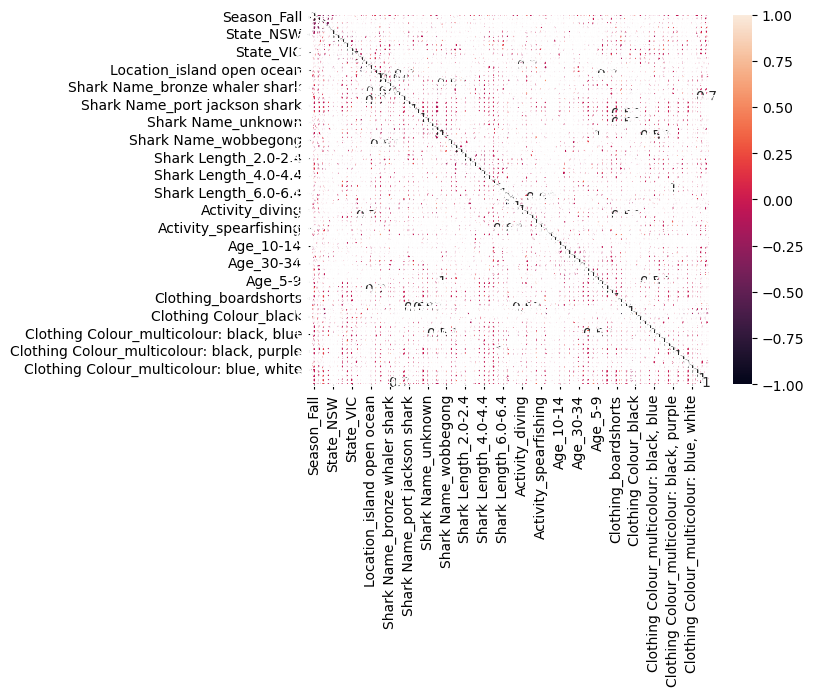

In [7]:
# doesn't work
# pd.tools.plotting.scatter_matrix(encoded_data.loc [:, 'Season':'Clothing Colour'], diagonal="kde")
# plt.tight_layout()
# plt.show ()

sns.heatmap(one_hot.corr(), annot=True)